Data Shape: (70000, 784)
Target Shape: (70000,)
Hidden count: 30
Iteration 0


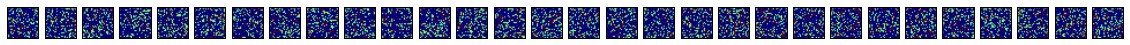

Iteration 5000


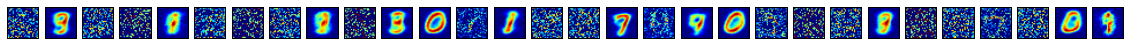

Iteration 10000


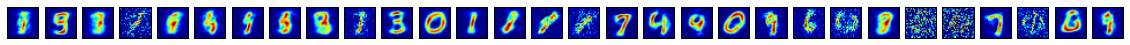

Iteration 15000


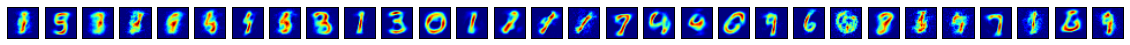

Iteration 20000


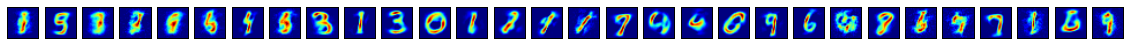

Iteration 25000


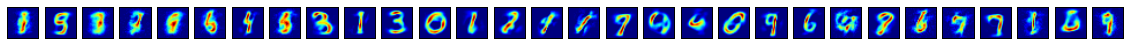

Iteration 30000


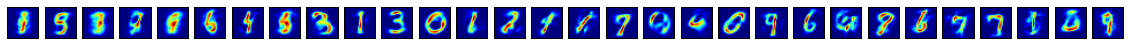

Iteration 35000


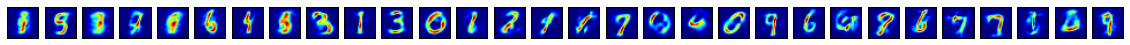

Iteration 40000


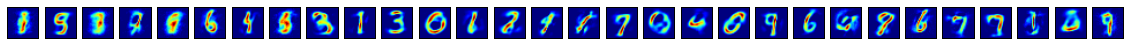

Iteration 45000


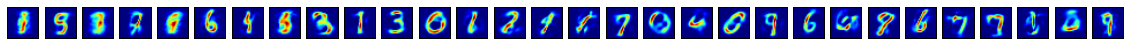

Iteration 50000


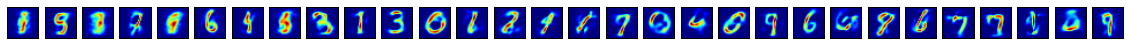

Iteration 55000


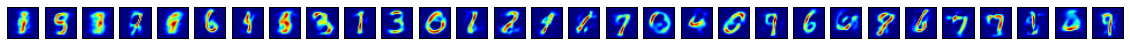

Iteration 60000


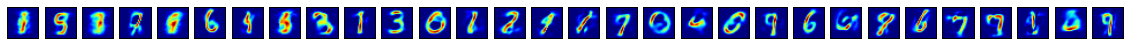

Iteration 65000


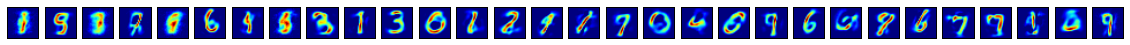

In [6]:
# %load exampleunlabeled.py
from util import get_mnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from gsdr import GSDR

# Get the MNIST data
mnist_data, mnist_target = get_mnist()
print("Data Shape:", mnist_data.shape)
print("Target Shape:", mnist_target.shape)

input_count = mnist_data.shape[1]
hidden_count = 30
forced_latent_count = 10

print("Hidden count:", hidden_count)

gsdr = GSDR(input_count, hidden_count, forced_latent_count)

states = np.eye(hidden_count)

for i in range(mnist_data.shape[0]):
    gsdr.train(mnist_data[i])

    if i % 5000 == 0:
        print("Iteration", i)
        f, ax = plt.subplots(1, hidden_count)

        f.set_size_inches(20, 20)
        
        # Generate one-hot states 0 to hidden_count
        for j in range(hidden_count):
            generated = (255 * np.clip(gsdr.generate_from_state(states[j]), 0, 1).reshape(28, 28)).astype(np.uint8)
            img = Image.fromarray(generated)
            ax[j].imshow(img)
            ax[j].axes.get_xaxis().set_visible(False)
            ax[j].axes.get_yaxis().set_visible(False)

        plt.show()
